## Today's Practice Topics
1. ### Data Plotting
2. ### Generating Samples
3. ### Regression (Overfitting, underfitting)
4. ### Data Loading
5. ### Classification

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

### Matplotlib Example

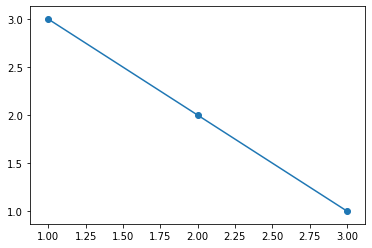

In [3]:
plt.plot([1,2,3], [3,2,1])
plt.scatter([1,2,3], [3,2,1])
plt.show()

In [4]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title("Title")
    plt.show()

### Drawing a function

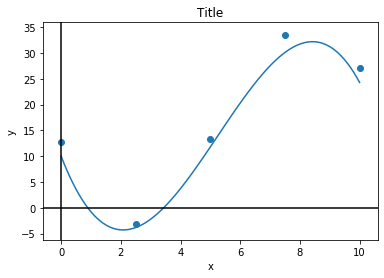

In [5]:
foo = lambda x: -(2/7*x**3-9/2*x**2+15*x-10.)
x_line = np.linspace(0, 10, 100)
y_line = foo(x_line)

# Quiz: Using linspace, sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=1.5 and visualize.
num_points = 5
x_sample = np.linspace(0, 10, num_points)
np.random.seed(seed=0)
y_sample = foo(x_sample) + np.random.normal(0, 1.5, num_points)

draw_plot([x_line], [y_line], x_sample, y_sample)

### Linear Regression

R^2:0.527995
MSE:76.873701


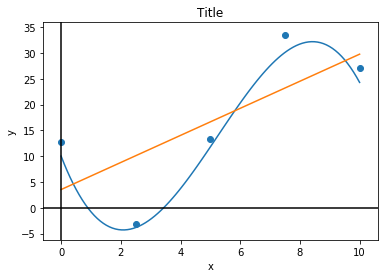

In [6]:
from sklearn.linear_model import LinearRegression

# Defining a linear regression model.
lr = LinearRegression()

# Training the linear regression model.
lr.fit(x_sample[:, None], y_sample)

# Coefficient of Determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print("R^2:%f" % r2)

# Predicting a single data point.
y_hat = lr.predict(x_sample[[0], None])
#print(x_sample[0])
#print(y_hat)

# Quiz: Calculate Mean Squared Error using x_sample and y_sample and lr.predict()
y_hat = lr.predict(x_sample[:, None])
print("MSE:%f" % ((y_sample - y_hat)**2).mean())

# Quiz: Use x_line, lr.predict() and draw_plot to visualize the linear regression model,
#       in comparison with the original function foo.
y_lr = lr.predict(x_line[:, None])
draw_plot([x_line, x_line], [y_line, y_lr], x_sample, y_sample)

### Polynomial Regression

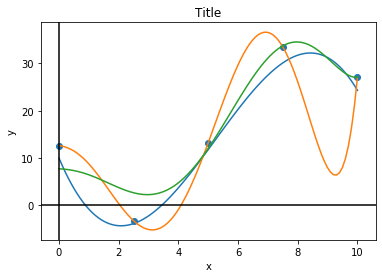

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Defining a polynomial feature transformer.
poly = PolynomialFeatures(degree=6)

# Transform the original features to polynomial features.
x_sample_poly = poly.fit_transform(x_sample[:, None])
#print(x_sample[:, None])
#print(x_sample_poly)

# Train a linear regression model using the polynomial features.
pr = LinearRegression().fit(x_sample_poly, y_sample)
rr = Ridge(alpha=30.0).fit(x_sample_poly, y_sample) # This is regression with L2-regularization.

# Quiz: Visualize the polynomial regression model, in comparison with foo.
x_line_poly = poly.fit_transform(x_line[:, None])
y_poly = pr.predict(x_line_poly)
y_ridge = rr.predict(x_line_poly)
draw_plot([x_line, x_line, x_line], [y_line, y_poly, y_ridge], x_sample, y_sample)

# Quiz: What happens if you increase/decrease the degree of the polynomial?

### Iris Dataset

In [8]:
# Preprocessing the raw Iris dataset (Download from https://archive.ics.uci.edu/ml/datasets/iris)
data_path = './iris.data'
X = []
y = []
with open(data_path, 'r') as fid:
    count = 0
    for line in fid:
        if not line:
            continue
        tokens = line.strip().split(',')
        
        label = 0
        if tokens[-1] == 'Iris-setosa':
            label = 0
        elif tokens[-1] == 'Iris-versicolor':
            label = 1
        else:
            label = 2

        X.append(np.array(tokens[:-1]).astype('float'))
        y.append(label)
X = np.array(X)
y = np.array(y)

In [9]:
# Using a special function provided by Scikit-learn to load the Iris dataset.
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Classifiers

In [11]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train)

# Quiz: Import Support Vector Machine, then train SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', degree=0, random_state=1234)
svm.fit(X_train[:, :2], y_train)

# Quiz: Import Decision Tree, then train DT
from sklearn.tree import DecisionTreeClassifier as DTC
tree = DTC(max_depth=3, random_state=1234)
tree.fit(X_train[:, :2], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [12]:
# Quiz: Use the model's predict() to calculate the test accuracy.
y_logistic = logistic.predict(X_test[:, :2])
print((y_test == y_logistic).astype('float').mean())

y_svm = svm.predict(X_test[:, :2])
print((y_test == y_svm).astype('float').mean())

y_tree = tree.predict(X_test[:, :2])
print((y_test == y_tree).astype('float').mean())

0.7333333333333333
0.7333333333333333
0.6


In [13]:
# You can use the score() to calculate accuracy as well.
print(logistic.score(X_test[:, :2], y_test))
print(svm.score(X_test[:, :2], y_test))
print(tree.score(X_test[:, :2], y_test))

0.7333333333333333
0.7333333333333333
0.6


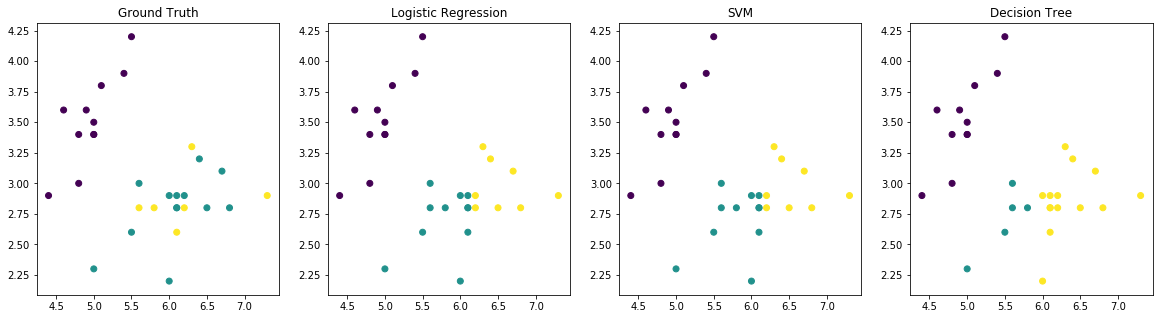

In [14]:
# Quiz: Can you draw four scatterplots for each model's predictions and the true labels? (Code by YoungSeo Park)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

plt.subplot(142)
plt.title('Logistic Regression')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_logistic)

plt.subplot(143)
plt.title('SVM')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svm)

plt.subplot(144)
plt.title('Decision Tree')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_tree)

plt.show()

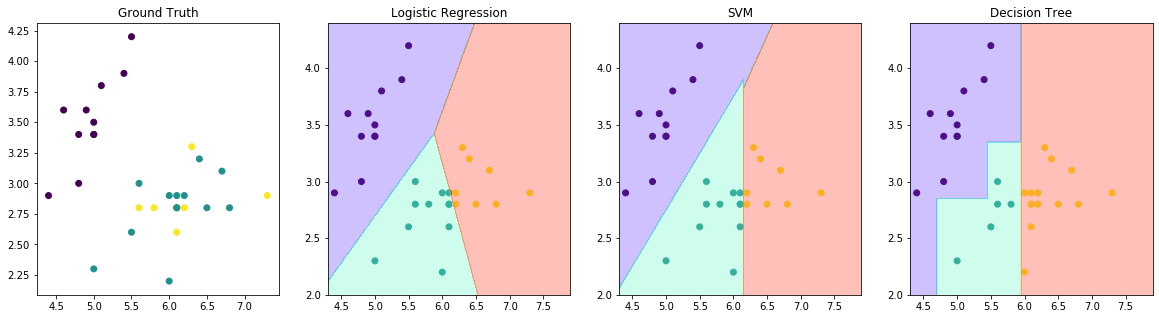

In [15]:
# Drawing the decision boundary of each model. (code by SeongMin Kim)
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.title('Ground Truth')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)


plt.subplot(142)
plt.title('Logistic Regression')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_logistic)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = logistic.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)


plt.subplot(143)
plt.title('SVM')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_svm)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = svm.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)


plt.subplot(144)
plt.title('Decision Tree')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_tree)

grid_size = 500
A, B = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), grid_size),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), grid_size))
C = tree.predict( np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)]) ).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3, cmap=plt.cm.rainbow)


plt.show()